In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [44]:
def hot_enocding(x,column):
    encoding_column = pd.get_dummies(x[column], prefix=column)
    x = x.drop(column, axis=1)
    x = x.join(encoding_column)
    return x
    
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [45]:
x = pd.read_csv("credit_score_clean.csv")

In [46]:
unique = x['Type_of_Loan'].unique()
res =set()
# create column for every unique value
for i in unique:
    split_unique = i.split(",")
    for j in split_unique:
        strpe_replace = j.replace("and","")
        stripe_j = strpe_replace.strip()
        res.add(stripe_j)
        
for i in res:
    x[i] = x['Type_of_Loan'].str.contains(i)
    
x = x.drop(['Type_of_Loan'], axis=1)


In [47]:
x["Payment_of_Min_Amount"]=custom_encoding(x["Payment_of_Min_Amount"])


In [48]:
x["Credit_Mix"]= custom_encoding(x["Credit_Mix"])


In [49]:
x=hot_enocding(x,"Payment_Behaviour")


In [50]:
x=hot_enocding(x,"Occupation")


In [51]:
x.to_csv("credit_score_clean_encoded.csv",index=False)

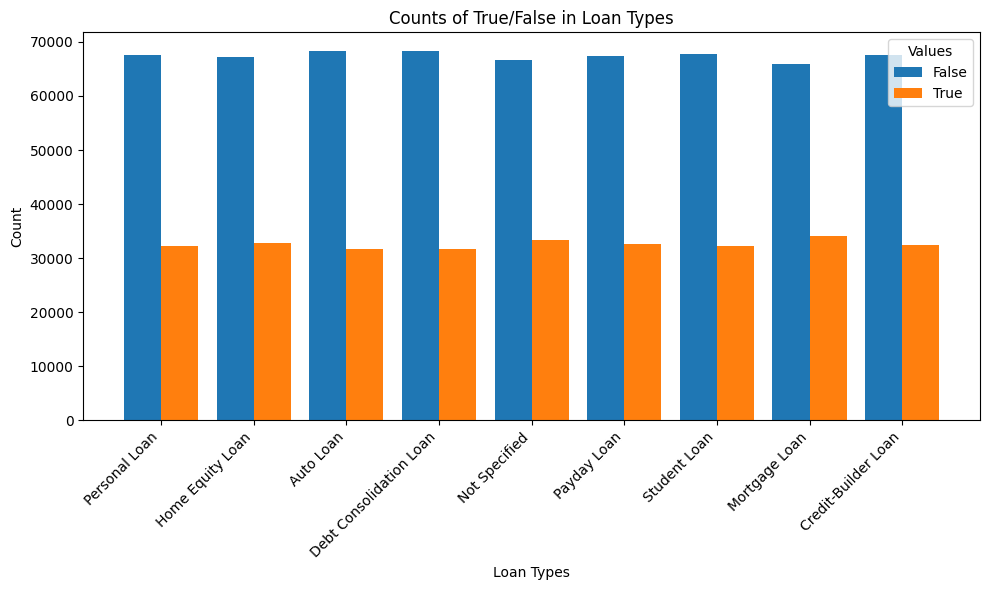

In [52]:
loan = ['Personal Loan', 'Home Equity Loan', 'Auto Loan', 'Debt Consolidation Loan', 'Not Specified', 'Payday Loan', 'Student Loan', 'Mortgage Loan', 'Credit-Builder Loan']
x_loan = x[loan]
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x_len = np.arange(len(loan))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Loan Types')
ax.set_xlabel('Loan Types')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(loan, rotation=45, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()